# Instalação Zabbix 5.0 - All In One

### Ambiente Utilizado

Servidor Zabbix Função: MariaDB / Zabbix Server / Frontend
 
 * Sistema Operacional: CentOS 7 (minimal)
 * Memória: 4GB de RAM
 * CPU: 2 vCPU
 * Disco: 20 GB


## Ajustes após instalação do S.O

**Entrar como root (use sudo nos casos de produção)**

In [ ]:
sudo su

**Verificar o timezone**

In [ ]:
timedatectl status

**Definir timezone**

In [ ]:
timedatectl set-timezone America/Sao_Paulo

**Verifique a mudança do timezone**

In [ ]:
timedatectl status

**Verifique a data e hora atual**

In [ ]:
date

**Desabilitar SELINUX (é necessário ser root)**

In [ ]:
vi /etc/selinux/config
SELINUX=disabled


salve o arquivo e depois de uma reboot na maquina

**Desabilitar Firewall**

In [ ]:
systemctl stop firewalld
systemctl disable firewalld

**Instalação de Binários**

In [ ]:
rpm -ivh https://dl.fedoraproject.org/pub/epel/epel-release-latest-7.noarch.rpm
yum install wget net-tools tcpdump mlocate vim ntp ntpdate tree -y
yum install epel* -y

**Instalando repositório Zabbix**

In [ ]:
rpm -Uvh https://repo.zabbix.com/zabbix/5.0/rhel/7/x86_64/zabbix-release-5.0-1.el7.noarch.rpm

**Atualizar o sistema**

In [ ]:
sudo yum update -y

**Install MariaDB**

In [ ]:
yum install mariadb-server -y

**Habilitando e dando start no serviço do banco**

In [ ]:
systemctl enable mariadb
systemctl start mariadb

**Criando uma base de dados inicial**

In [ ]:
mysql -uroot -p
password
mysql> create database zabbix character set utf8 collate utf8_bin;
mysql> create user zabbix@localhost identified by 'password';
mysql> grant all privileges on zabbix.* to zabbix@localhost;
mysql> quit;

**Instalando o Zabbix Server**

In [ ]:
yum install zabbix-server -y

**Carregando esquema inicial do banco de dados**

In [ ]:
zcat /usr/share/doc/zabbix-server-mysql*/create.sql.gz | mysql -uzabbix -p zabbix

**Verificar se o Banco de Dados foi povoado**

In [ ]:
mysql -u zabbix -p zabbix
use zabbix;
show tables;
quit;

Ao final tem que ter 166 tabelas no banco

**Editar arquivo de configuração do Zabbix Server**

In [ ]:
vi /etc/zabbix/zabbix_server.conf

BHost=localhost
DBName=zabbix
DBUser=zabbix
DBPassword=password

**Habilitando e dando start no serviço do Zabbix Server**

In [ ]:
systemctl enable zabbix-server
systemctl start zabbix-server

**Verifique os logs do Zabbix Server e veja se tem erros**

In [ ]:
tail -n50 /var/log/zabbix/zabbix_server.log

**Install Zabbix frontend**

Enable Red Hat Software Collections

In [ ]:
vi /etc/yum.repos.d/zabbix.repo



[zabbix-frontend]
...
enabled=1
...

**Pacotes Zabbix Frontend**


In [ ]:
yum install zabbix-web-mysql-scl zabbix-apache-conf-scl

**Configure PHP para o Zabbix frontend**

In [ ]:
/etc/opt/rh/rh-php72/php-fpm.d/zabbix.conf

; php_value[date.timezone] = America/Sao_Paulo

Lembre-se de tirar o ponto e virgula

**Instalar Zabbix Agent**

In [ ]:
yum install zabbix-agent

**Start Zabbix server e agent processes**

In [ ]:
systemctl restart zabbix-server zabbix-agent httpd rh-php72-php-fpm
systemctl enable zabbix-server zabbix-agent httpd rh-php72-php-fpm

In [ ]:
http://server_ip_or_name/zabbix

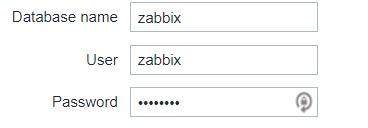

password= password

In [ ]:
Usuário: Admin
Senha: zabbix